In [140]:
import numpy as np
from importlib import reload
from scipy import signal

import plotting_tools as pt
import utils
import dsi
utils = reload(utils)
pt = reload(pt)
dsi = reload(dsi)

import pickle
import sys
# Notebook needs to see the RKLM_Python module to load pickled class instances
sys.path.append('../RKLM_Python/')

from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt

In [141]:
Nx, Ny = 301, 10
N = 1

def load(Nx,Ny,et):
    base_fn = 'output_lamb_wave'
    pydir = '../%s/' %base_fn

    tc = utils.test_case(base_fn, pydir, Nx, Ny, et)
    tags = tc.get_tag_dict()
    
    return tc, tags

i2 = (slice(2,-2),slice(2,-2))

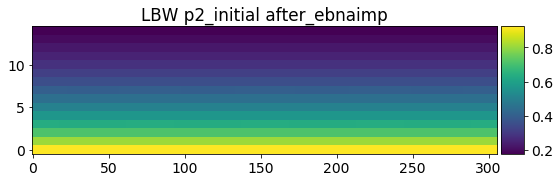

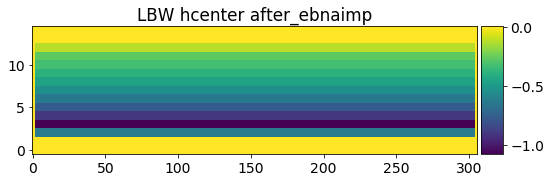

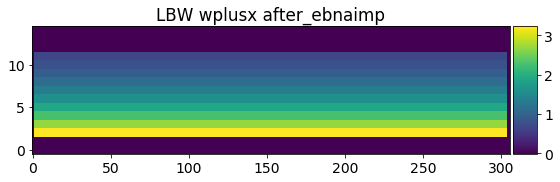

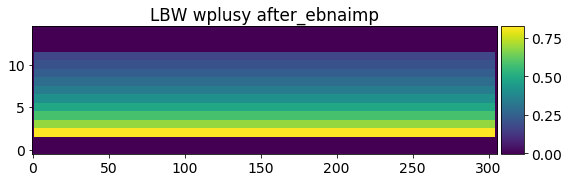

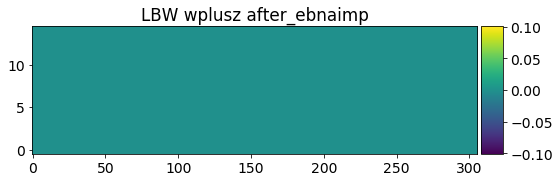

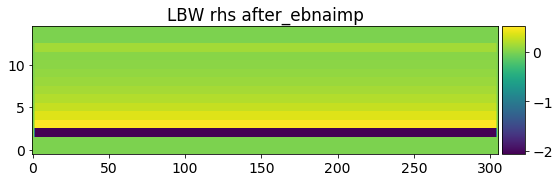

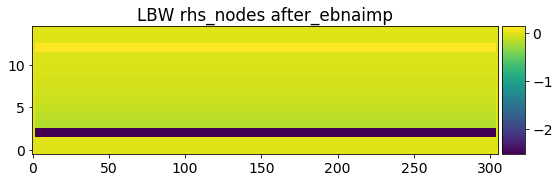

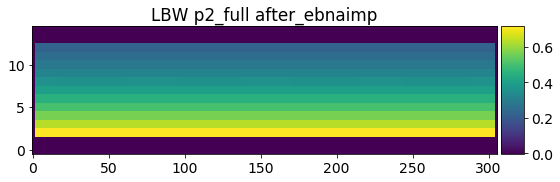

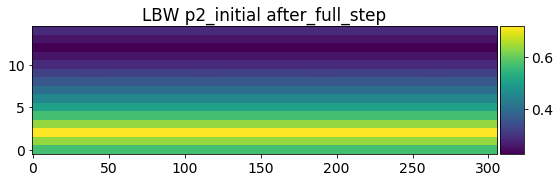

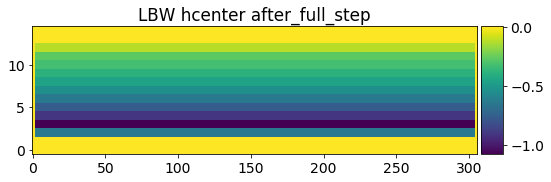

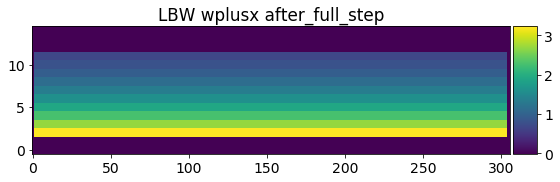

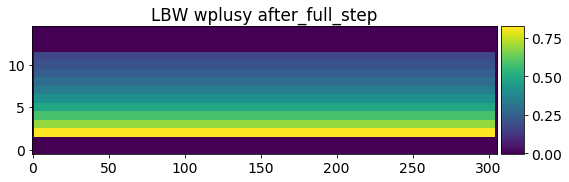

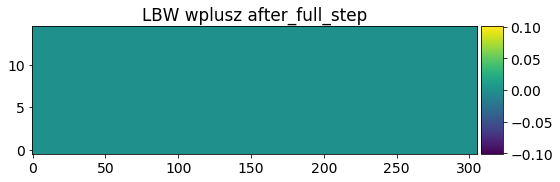

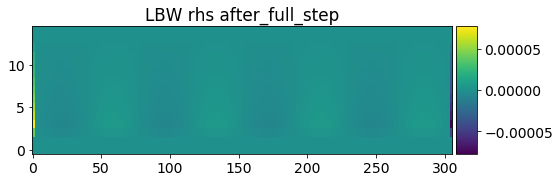

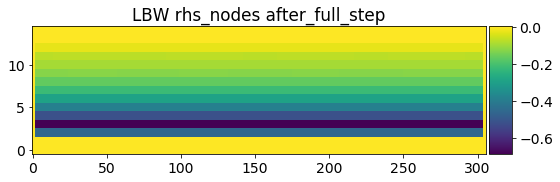

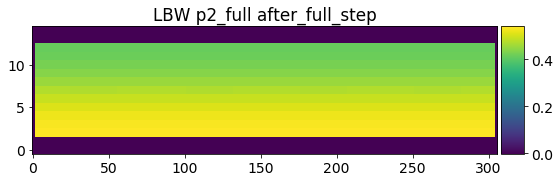

In [142]:
l_typ = 'WINDOW_STEP'
diff = False
attr_labels = pt.labels()

def get_ens(tc, tag, times, sfx , diff, attribute):
#     idx = 0 if tag is 'ic' else 1
    idx = 0
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=False, load_ic=False)[idx]

    label = sfx + '_' + attribute
    return label, ens.T

sfx1 = 'debug_ic'
et = 195.0

tc, tags = load(Nx,Ny,et)
debug_attrs = tc.get_debug_attrs()
times = [0]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

if times[0] == 0:
    ic_dict = {-1:'ic'}
    ic_dict.update(tags)
    tags = ic_dict
    
for tag in tags.values():
    if tag == 'after_ebnaimp' or tag == 'after_full_step':
        for attribute in debug_attrs.values():
            _, a1 = get_ens(tc, tag, times, sfx1, diff, attribute)

            la = 'LBW %s %s' %(attribute,tag)
            aa = a1

            ll = [aa, la]
            pl_lst = [ll]

            pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
            _ = pl.plot(method='imshow')


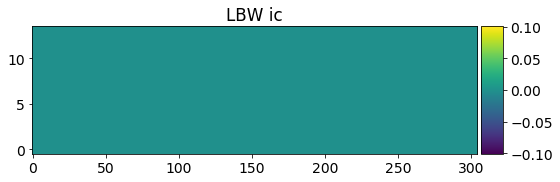

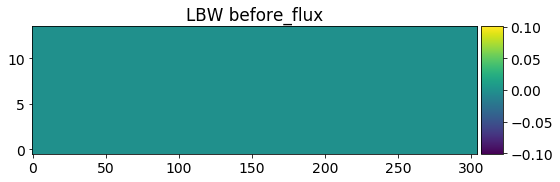

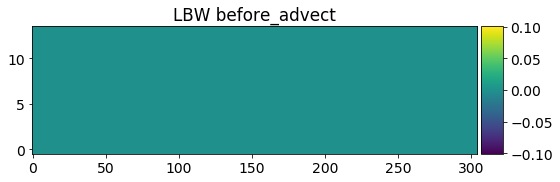

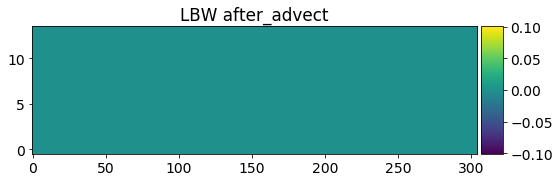

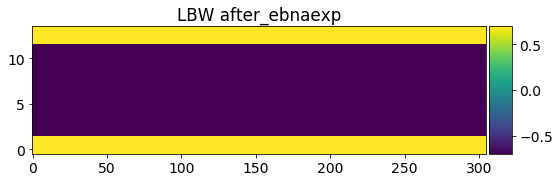

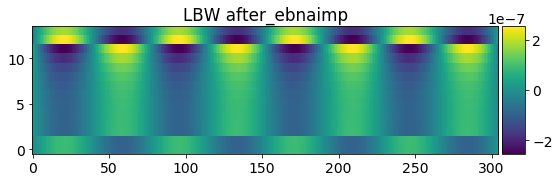

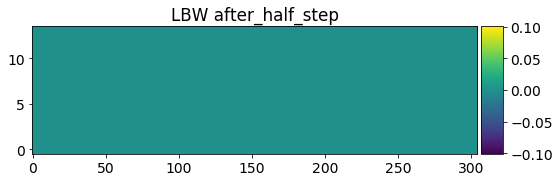

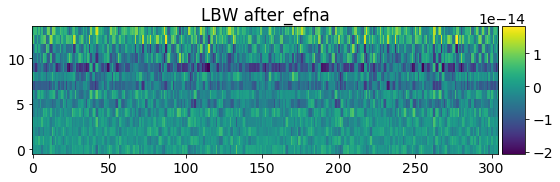

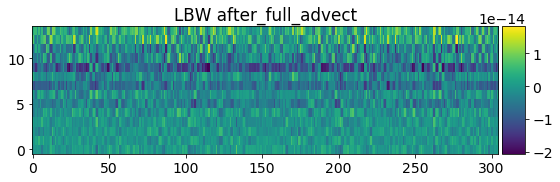

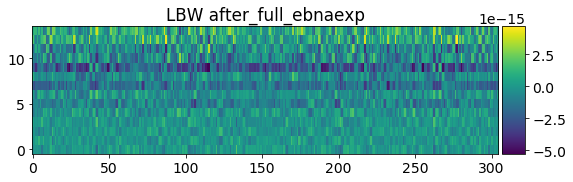

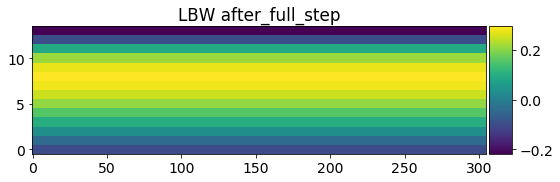

In [144]:
l_typ = 'WINDOW_STEP'
diff = False
attr_labels = pt.labels()

def get_ens(tc, times, sfx , diff, attribute):
    idx = 0 if tag is 'ic' else 1
    ens = tc.get_ensemble(times, N, attribute, sfx, label_type=l_typ, avg=True, diff=diff, tag=tag, inner=False)[idx]

    label = sfx + '_' + attribute
    return label, ens.T

sfx1 = 'debug_ic'
et = 195.0

tc, tags = load(Nx,Ny,et)
debug_attrs = tc.get_debug_attrs()
times = [0]

# load pickled instances of data used in simulation
fn_pickle = tc.get_filename(N,sfx1,format='dat')
path_pickle = tc.get_path(fn_pickle)

file = open(path_pickle,'rb')
ud = pickle.load(file)
elem = pickle.load(file)
file.close()

S0 = (ud.stratification(elem.y)).reshape(-1,1)

if times[0] == 0:
    ic_dict = {-1:'ic'}
    ic_dict.update(tags)
    tags = ic_dict
    
for tag in tags.values():        
    attribute = 'rho'
    _, a1 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'rhov'
    _, a2 = get_ens(tc, times, sfx1, diff, attribute)
    attribute = 'rhoY'
    _, a3 = get_ens(tc, times, sfx1, diff, attribute)
    
    la = 'LBW %s' %tag
    aa = a2 / a1
#         aa = a3/a1 * a2 - a1
#         aa = a3 / a1
#         aa = aa[i2]
    sigma = 0.78
    # aa = gaussian_filter(aa, sigma)

    ll = [aa, la]
    pl_lst = [ll]

    pl = pt.plotter(pl_lst,ncols=1,figsize=(8,3),sharey=False)
    _ = pl.plot(method='imshow')
